# Plotting for EDA - Haberman's Survival Data Set

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.  

Attribute Information:  
* Age of patient at the time of operation (numerical)  
* Patient's year of operation (year - 1900, numerical)  
* Number of positive axillary nodes detected (numerical)  
* Survival status (class attribute)   
 * 1 = the patient survived 5 years or longer    
2 = the patient died within 5 years

## Import required modules and load dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Mount drive for google colab to access files on drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd '/content/drive/My Drive/Colab Notebooks/AppliedAI'

/content/drive/My Drive/Colab Notebooks/AppliedAI


In [5]:
haber = pd.read_csv('haberman.csv',header=None)

In [6]:
# Assigned column names for the ease of understanding the flow ( refer to Attribute info above for more information)
haber.columns=['Age','Op_year','axil_nodes','Survival']

In [7]:
haber.head()

,Age,Op_year,axil_nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
# Check data types of columns 
haber.dtypes

Age           int64
Op_year       int64
axil_nodes    int64
Survival      int64
dtype: object

In [ ]:
# Number of records
haber.shape

(306, 4)

In [ ]:
# Classes
haber['Survival'].value_counts()

1    225
2     81
Name: Survival, dtype: int64

* There are 306 records and 4 features in the dataset  
* There are 2 classes - 1,2 and clearly class '1' has more data points than '2' - so may result in bias

## Univariate Analysis

### Histogram

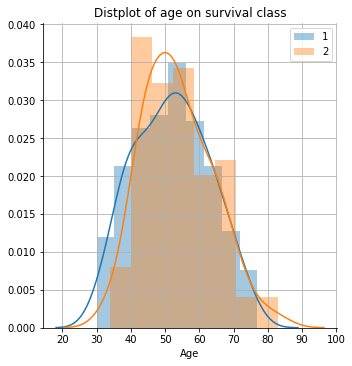

In [35]:
sns.FacetGrid(haber,hue='Survival',size=5) \
    .map(sns.distplot, 'Age')
plt.title("Distplot of age on survival class")
plt.legend()
plt.grid()
plt.show()


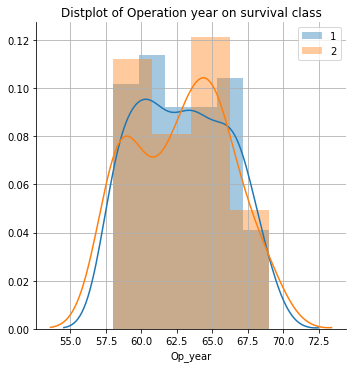

In [36]:
sns.FacetGrid(haber,hue='Survival',size=5) \
    .map(sns.distplot, 'Op_year') 
plt.title("Distplot of Operation year on survival class")
plt.legend()
plt.grid()
plt.show()


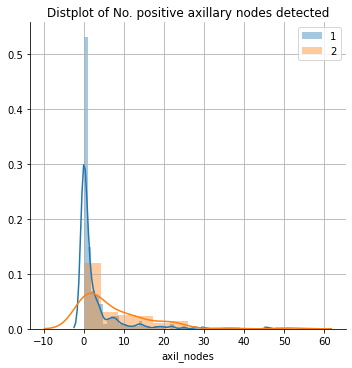

In [37]:
sns.FacetGrid(haber, hue='Survival', size=5) \
    .map(sns.distplot,'axil_nodes') 
plt.title("Distplot of No. positive axillary nodes detected")
plt.legend()
plt.grid()
plt.show()

* Both classes are overlapping in all 3 cases
* Age, Operation year of both classes are more overlapping
* In axil_nodes feature, both classes have more density towards the start(<10) and class 1 has many samples close to 0.


### PDF,CDF

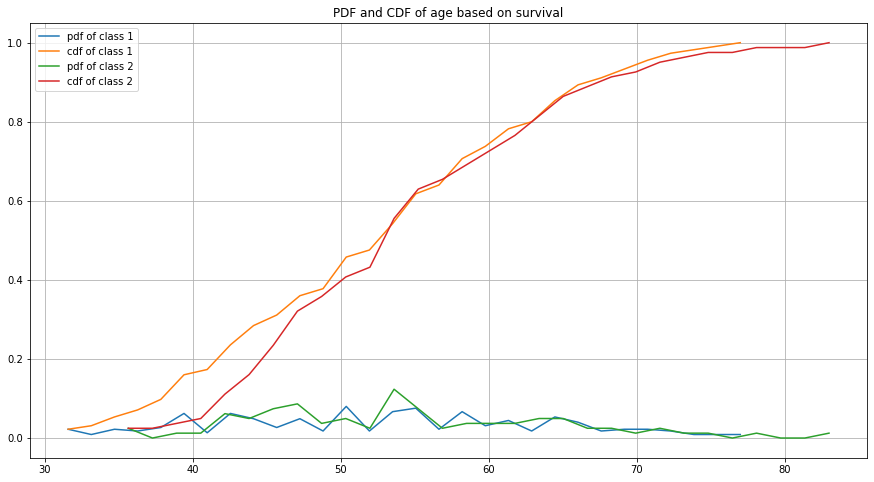

In [16]:
counts, bins = np.histogram(haber[haber['Survival']==1]['Age'],bins=30,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.figure(figsize=(15,8))
plt.plot(bins[1:], pdf, label = 'pdf of class 1')
plt.plot(bins[1:], cdf, label = 'cdf of class 1')

counts, bins = np.histogram(haber[haber['Survival']==2]['Age'],bins=30,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bins[1:],pdf, label = 'pdf of class 2')
plt.plot(bins[1:],cdf, label = 'cdf of class 2')
plt.title('PDF and CDF of age based on survival')
plt.legend()
plt.grid()
plt.show()

* bold text 60 percent of the samples have less than 55 yrs age
* Both plots are overlapped, so it is difficult to classify one class from another using this feature

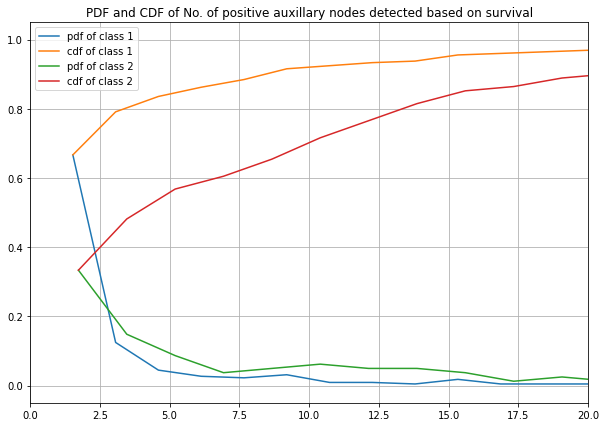

In [17]:
counts, bins = np.histogram(haber[haber['Survival']==1]['axil_nodes'],bins=30,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.figure(figsize=(10,7))
plt.plot(bins[1:], pdf, label = 'pdf of class 1')
plt.plot(bins[1:], cdf, label = 'cdf of class 1')
counts, bins = np.histogram(haber[haber['Survival']==2]['axil_nodes'],bins=30,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf, label = 'pdf of class 2')
plt.plot(bins[1:],cdf, label = 'cdf of class 2')
plt.xlim(0,20)
plt.title('PDF and CDF of No. of positive auxillary nodes detected based on survival')
plt.legend()
plt.grid()
plt.show()

* More than 80% of samples have axil_nodes less than 5
* A sample with axil_nodes <=3 has 80% probabilty of being class 1 while class 2 has around 50%

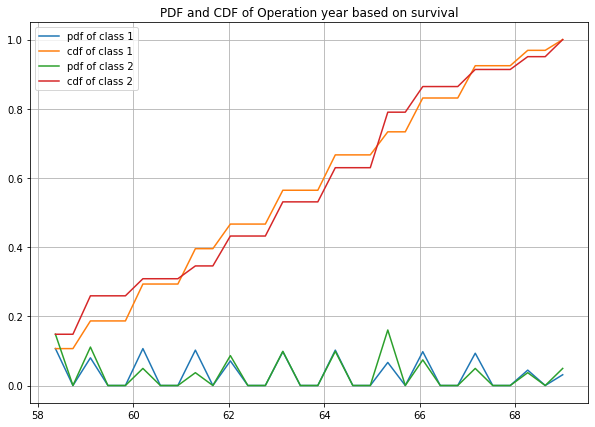

In [18]:
counts, bins = np.histogram(haber[haber['Survival']==1]['Op_year'],bins=30,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.figure(figsize=(10,7))
plt.plot(bins[1:], pdf, label = 'pdf of class 1')
plt.plot(bins[1:], cdf, label = 'cdf of class 1')
counts, bins = np.histogram(haber[haber['Survival']==2]['Op_year'],bins=30,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bins[1:],pdf, label = 'pdf of class 2')
plt.plot(bins[1:],cdf, label = 'cdf of class 2')
plt.title('PDF and CDF of Operation year based on survival')
plt.legend()
plt.grid()
plt.show()

* Number of samples are approximately equal thoughout all years 
* Around 1968 onwards, number of operations decreased
* 60% of samples had opeartion before 1964 
* Both have similar curves, so this feature is not useful to classify 

### Box Plot

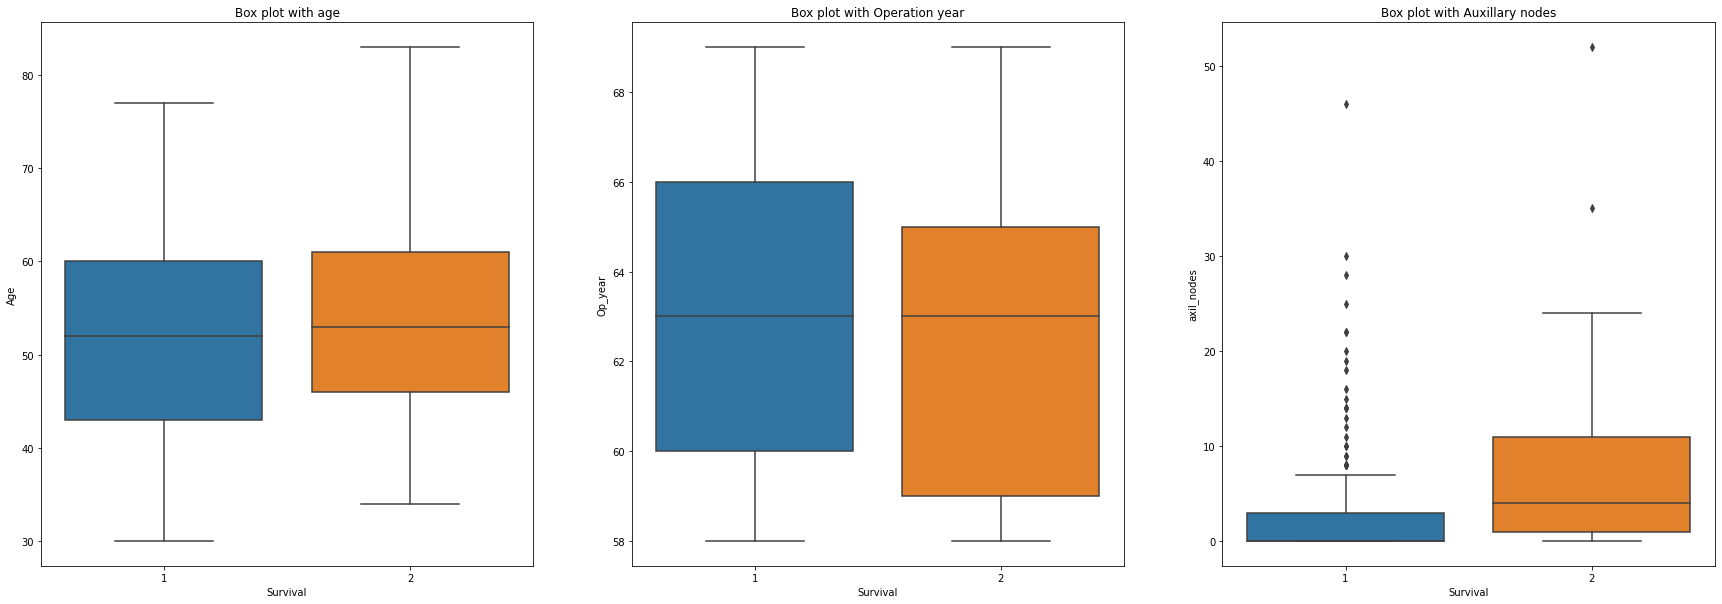

In [34]:
fig, ax = plt.subplots(1,3,figsize=(30,10))
sns.boxplot(x='Survival', y='Age', data = haber, ax=ax[0])
ax[0].title.set_text('Box plot with age')
sns.boxplot(y='Op_year',x='Survival',data = haber, ax=ax[1])
ax[1].title.set_text('Box plot with Operation year')
sns.boxplot(x='Survival',y='axil_nodes', data = haber, ax=ax[2])
ax[2].title.set_text('Box plot with Auxillary nodes')
plt.show()

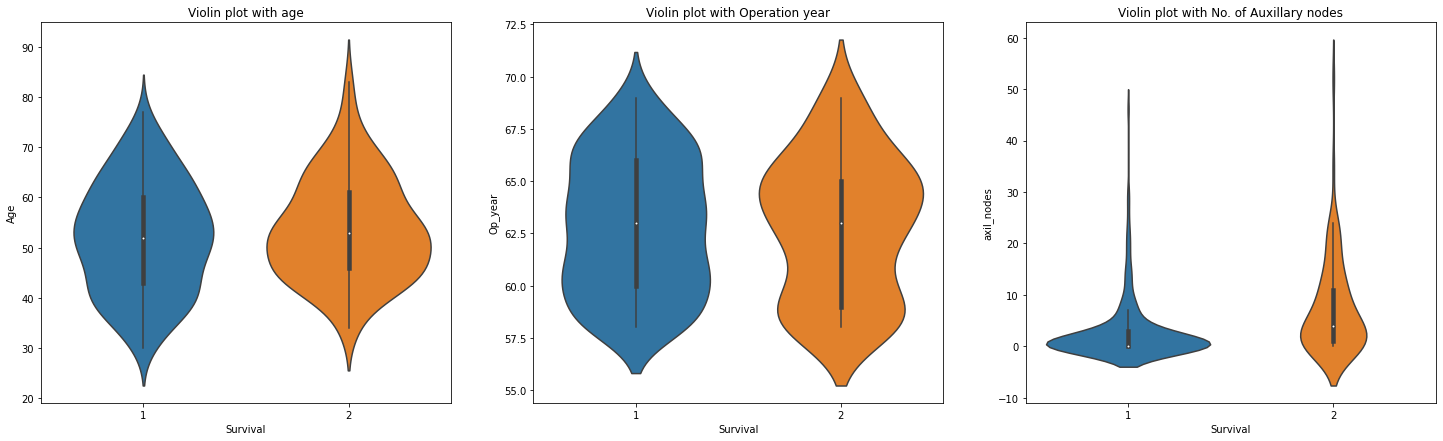

In [25]:
fig, ax = plt.subplots(1,3,figsize=(25,7))
sns.violinplot(x='Survival', y='Age', data = haber, ax=ax[0])
ax[0].title.set_text('Violin plot with age')
sns.violinplot(y='Op_year',x='Survival',data = haber, ax=ax[1])
ax[1].title.set_text('Violin plot with Operation year')
sns.violinplot(x='Survival',y='axil_nodes', data = haber, ax=ax[2])
ax[2].title.set_text('Violin plot with No. of Auxillary nodes')
plt.show()

* It is quite difficult to say one feature is able to differentiate 1 class from another
* For Age and Op_year feature, both classes have approxiamtely same quartiles and same distribution
* For axil_nodes feature, majority of samples (as per IQR) of class 1 are within 2nd quartile/median of class 2. 

## Bi-variate analysis

### Pairplot


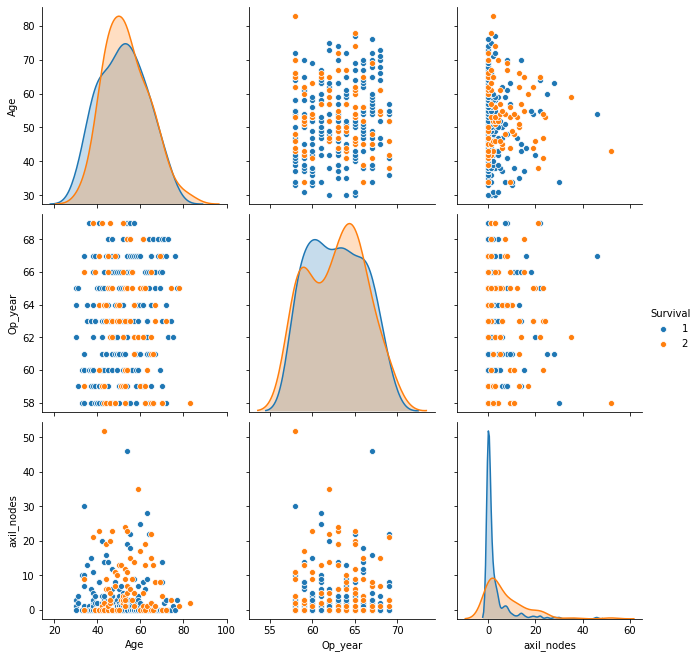

In [40]:
sns.pairplot(haber, hue='Survival', size=3)
plt.show()

* All features have overlaps making it difficult to differentiate the 2 classes by picking any 2 features

## Observation:
* There are more number of class 1 samples, so there is a possibility of bias
* Op_year and Age have overlapping classes, so it is difficult to classify using them
*  No pair in bi-variate analysis showed any promise to use for seperating or classification 
* axil_nodes is a better option over other features, which can be used to classify but with errors. If axil_nodes of a sample <=3, it has 80% probabilty of being class 1 while being class 2 has around 50%